Decision Tree Accuracy: 0.9805142857142857
Confusion Matrix:
[[17153   389]
 [  293 17165]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     17542
         1.0       0.98      0.98      0.98     17458

    accuracy                           0.98     35000
   macro avg       0.98      0.98      0.98     35000
weighted avg       0.98      0.98      0.98     35000



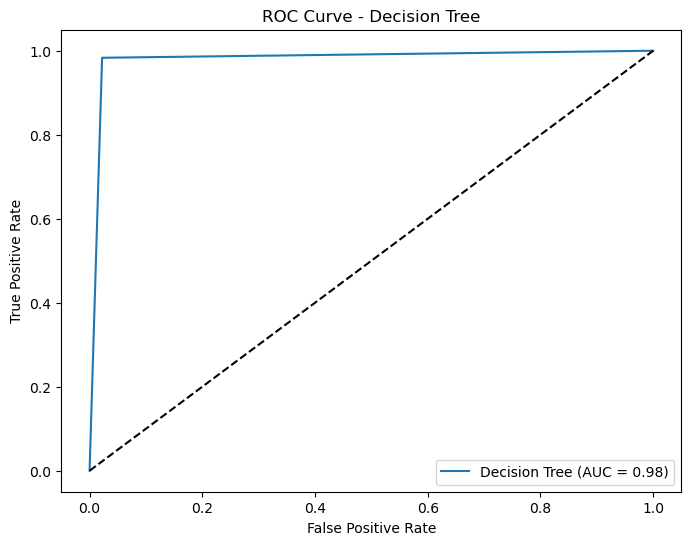

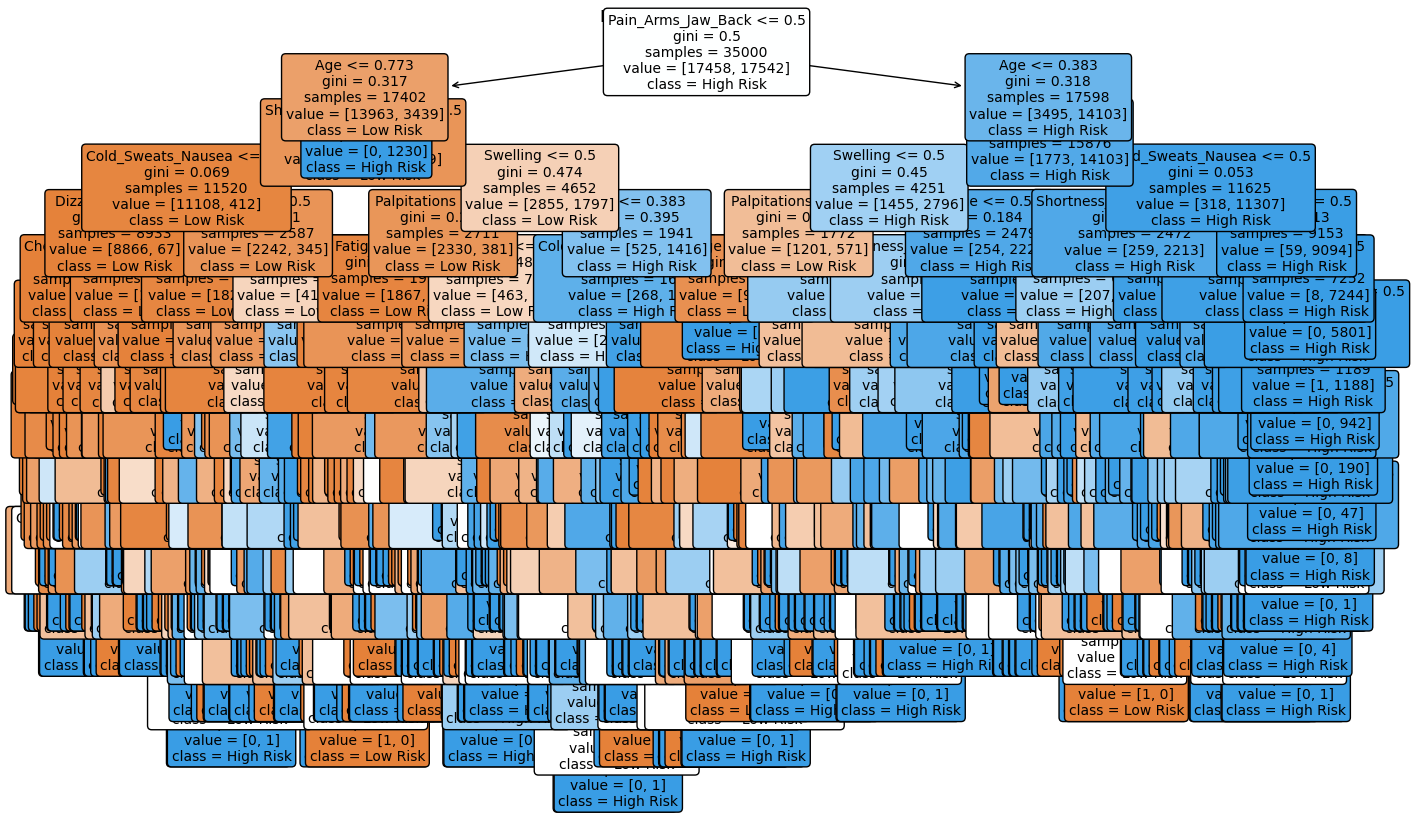

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("heart_disease_risk_dataset_earlymed.csv")


scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

X = df.drop(columns=['Heart_Risk'])
y = df['Heart_Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
# for information gain instead of Gini purity: dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
y_pred_prob = dt_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Decision Tree Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()

plt.figure(figsize=(16, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=["Low Risk", "High Risk"],
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Structure")
plt.show()